In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train_df = pd.read_excel('/content/drive/My Drive/train.xlsx')
test_df = pd.read_excel('/content/drive/My Drive/test.xlsx')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statistics import mean

In [ ]:
train_df.head()

,ID,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyUnusedResults,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyExplaining,WorkChallengeFrequencyTalent,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,1,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,NaN,NaN,Very useful,NaN,NaN,NaN,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,NaN,Always,Random Forests,Often,NaN,Often,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,NaN,4
1,2,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,NaN,NaN,NaN,Very useful,NaN,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,NaN,Sometimes,Most of the time,NaN,NaN,NaN,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,Often,NaN,NaN,NaN,100% of projects,More internal than external,Business Department,NaN,7
2,3,Female,United States,34.0,Employed full-time,Yes,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,NaN,Often,Often,NaN,NaN,Often,Sometimes,NaN,Sometimes,NaN,Sometimes,NaN,NaN,Sometimes,NaN,Most of the time,2.0,10-25% of projects,More internal than external,Other,Rarely,6
3,4,Female,United States,33.0,Employed full-time,Yes,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,NaN,NaN,Very useful,NaN,Somewhat useful,NaN,NaN,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,NaN,NaN,NaN,Often,NaN,Sometimes,NaN,Often,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Rarely,Rarely,2.0,76-99% of projects,Do not know,Other,Rarely,9
4,5,Female,United States,35.0,Employed full-time,Yes,Software Developer/Software Engineer

In [ ]:
train_label=train_df.pop("JobSatisfaction")


In [ ]:
train=train_df
test=test_df

In [ ]:
train=train.drop(train.columns[[0,12,13,14,15,16,17,18,37,38,39,40,42,44]],axis=1)
test=test.drop(test.columns[[0,12,13,14,15,16,17,18,37,38,39,40,42,44]],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GenderSelect                            5519 non-null   object 
 1   Country                                 5513 non-null   object 
 2   Age                                     5461 non-null   float64
 3   EmploymentStatus                        5529 non-null   object 
 4   CodeWriter                              5529 non-null   object 
 5   CurrentJobTitleSelect                   5527 non-null   object 
 6   TitleFit                                5427 non-null   object 
 7   CurrentEmployerType                     5458 non-null   object 
 8   MLToolNextYearSelect                    5298 non-null   object 
 9   MLMethodNextYearSelect                  5252 non-null   object 
 10  LanguageRecommendationSelect            5334 non-null   obje

In [ ]:
train=train.drop(columns='WorkChallengeFrequencyClarity')
#train=train.drop(columns='WorkChallengeFrequencyDataAccess')
train=train.drop(columns='WorkToolsFrequencySQL')
train=train.drop(columns='WorkMethodsFrequencyDecisionTrees')
train=train.drop(columns='WorkMethodsFrequencyCross-Validation')
train=train.drop(columns='WorkMethodsFrequencyLogisticRegression')
#train=train.drop(columns='WorkChallengeFrequencyTalent')

In [ ]:
test=test.drop(columns='WorkChallengeFrequencyClarity')
#test=test.drop(columns='WorkChallengeFrequencyDataAccess')
test=test.drop(columns='WorkToolsFrequencySQL')
test=test.drop(columns='WorkMethodsFrequencyDecisionTrees')
test=test.drop(columns='WorkMethodsFrequencyCross-Validation')
test=test.drop(columns='WorkMethodsFrequencyLogisticRegression')

In [ ]:
#test=test.drop(columns='WorkChallengeFrequencyTalent')

In [ ]:
test=test.drop(columns='WorkToolsFrequencyR')
train=train.drop(columns='WorkToolsFrequencyR')


In [ ]:
test=test.drop(columns='WorkAlgorithmsSelect')
train=train.drop(columns='WorkAlgorithmsSelect')

In [ ]:
test=test.drop(columns='MLMethodNextYearSelect')
train=train.drop(columns='MLMethodNextYearSelect')

In [ ]:
print(test.shape,train.shape)

(1000, 31) (5529, 31)


In [ ]:
train["DataScienceIdentitySelect"].unique()

array(['Sort of (Explain more)', 'No', nan, 'Yes'], dtype=object)

In [ ]:
#too many attributes 
train=train.drop(columns='MLTechniquesSelect')
train=train.drop(columns='MLSkillsSelect')
train=train.drop(columns='PastJobTitlesSelect')

test=test.drop(columns='MLTechniquesSelect')
test=test.drop(columns='MLSkillsSelect')
test=test.drop(columns='PastJobTitlesSelect')

In [ ]:
train.isnull().sum()

GenderSelect                               10
Country                                    16
Age                                        68
EmploymentStatus                            0
CodeWriter                                  0
CurrentJobTitleSelect                       2
TitleFit                                  102
CurrentEmployerType                        71
MLToolNextYearSelect                      231
LanguageRecommendationSelect              195
DataScienceIdentitySelect                1545
FormalEducation                             7
MajorSelect                               519
Tenure                                     14
EmployerIndustry                           12
EmployerSize                              581
WorkProductionFrequency                   626
WorkToolsFrequencyPython                 1282
WorkMethodsFrequencyDataVisualization    1909
WorkChallengeFrequencyPolitics           3437
WorkChallengeFrequencyDirtyData          2760
WorkChallengeFrequencyTalent      

In [ ]:
#missing
train['GenderSelect']=train['GenderSelect'].fillna(train['GenderSelect'].mode()[0])
train['Country']=train['Country'].fillna(train['Country'].mode()[0])
train['TitleFit']=train['TitleFit'].fillna(train['TitleFit'].mode()[0])
train['MajorSelect']=train['MajorSelect'].fillna(train['MajorSelect'].mode()[0])
train['CurrentEmployerType']=train['CurrentEmployerType'].fillna(train['CurrentEmployerType'].mode()[0])
train['CurrentJobTitleSelect']=train['CurrentJobTitleSelect'].fillna(train['CurrentJobTitleSelect'].mode()[0])
train['FormalEducation']=train['FormalEducation'].fillna(train['FormalEducation'].mode()[0])
train['Tenure']=train['Tenure'].fillna(train['Tenure'].mode()[0])
train['EmployerIndustry']=train['EmployerIndustry'].fillna(train['EmployerIndustry'].mode()[0])
train['EmployerSize']=train['EmployerSize'].fillna(train['EmployerSize'].mode()[0])
train['WorkProductionFrequency']=train['WorkProductionFrequency'].fillna(train['WorkProductionFrequency'].mode()[0])
train['WorkDataVisualizations']=train['WorkDataVisualizations'].fillna(train['WorkDataVisualizations'].mode()[0])
train['WorkInternalVsExternalTools']=train['WorkInternalVsExternalTools'].fillna(train['WorkInternalVsExternalTools'].mode()[0])
train['WorkMLTeamSeatSelect']=train['WorkMLTeamSeatSelect'].fillna(train['WorkMLTeamSeatSelect'].mode()[0])
train['RemoteWork']=train['RemoteWork'].fillna(train['RemoteWork'].mode()[0])
train['MLToolNextYearSelect']=train['MLToolNextYearSelect'].fillna(train['MLToolNextYearSelect'].mode()[0])
train['LanguageRecommendationSelect']=train['LanguageRecommendationSelect'].fillna(train['LanguageRecommendationSelect'].mode()[0])
train['DataScienceIdentitySelect']=train['DataScienceIdentitySelect'].fillna(train['DataScienceIdentitySelect'].mode()[0])
train['WorkMethodsFrequencyDataVisualization']=train['WorkMethodsFrequencyDataVisualization'].fillna(train['WorkMethodsFrequencyDataVisualization'].mode()[0])
train['WorkToolsFrequencyPython']=train['WorkToolsFrequencyPython'].fillna(train['WorkToolsFrequencyPython'].mode()[0])
train['WorkChallengeFrequencyDirtyData']=train['WorkChallengeFrequencyDirtyData'].fillna(train['WorkChallengeFrequencyDirtyData'].mode()[0]) 
train['WorkChallengeFrequencyPolitics']=train['WorkChallengeFrequencyPolitics'].fillna(train['WorkChallengeFrequencyPolitics'].mode()[0])   
train['WorkChallengeFrequencyTalent']=train['WorkChallengeFrequencyTalent'].fillna(train['WorkChallengeFrequencyTalent'].mode()[0]) 
train['WorkChallengeFrequencyDataAccess']=train['WorkChallengeFrequencyDataAccess'].fillna(train['WorkChallengeFrequencyDataAccess'].mode()[0])     






test['GenderSelect']=test['GenderSelect'].fillna(train['GenderSelect'].mode()[0])
test['Country']=test['Country'].fillna(train['Country'].mode()[0])
test['TitleFit']=test['TitleFit'].fillna(train['TitleFit'].mode()[0])
test['MajorSelect']=test['MajorSelect'].fillna(train['MajorSelect'].mode()[0])
test['CurrentEmployerType']=test['CurrentEmployerType'].fillna(train['CurrentEmployerType'].mode()[0])
test['CurrentJobTitleSelect']=test['CurrentJobTitleSelect'].fillna(train['CurrentJobTitleSelect'].mode()[0])
test['FormalEducation']=test['FormalEducation'].fillna(train['FormalEducation'].mode()[0])
test['Tenure']=test['Tenure'].fillna(train['Tenure'].mode()[0])
test['EmployerIndustry']=test['EmployerIndustry'].fillna(train['EmployerIndustry'].mode()[0])
test['EmployerSize']=test['EmployerSize'].fillna(train['EmployerSize'].mode()[0])
test['WorkProductionFrequency']=test['WorkProductionFrequency'].fillna(train['WorkProductionFrequency'].mode()[0])
test['WorkDataVisualizations']=test['WorkDataVisualizations'].fillna(train['WorkDataVisualizations'].mode()[0])
test['WorkInternalVsExternalTools']=test['WorkInternalVsExternalTools'].fillna(train['WorkInternalVsExternalTools'].mode()[0])
test['WorkMLTeamSeatSelect']=test['WorkMLTeamSeatSelect'].fillna(train['WorkMLTeamSeatSelect'].mode()[0])
test['RemoteWork']=test['RemoteWork'].fillna(train['RemoteWork'].mode()[0])
test['MLToolNextYearSelect']=test['MLToolNextYearSelect'].fillna(train['MLToolNextYearSelect'].mode()[0])
test['LanguageRecommendationSelect']=test['LanguageRecommendationSelect'].fillna(train['LanguageRecommendationSelect'].mode()[0])
test['DataScienceIdentitySelect']=test['DataScienceIdentitySelect'].fillna(train['DataScienceIdentitySelect'].mode()[0])
test['WorkMethodsFrequencyDataVisualization']=test['WorkMethodsFrequencyDataVisualization'].fillna(train['WorkMethodsFrequencyDataVisualization'].mode()[0])
test['WorkToolsFrequencyPython']=test['WorkToolsFrequencyPython'].fillna(train['WorkToolsFrequencyPython'].mode()[0])
test['WorkChallengeFrequencyDirtyData']=test['WorkChallengeFrequencyDirtyData'].fillna(train['WorkChallengeFrequencyDirtyData'].mode()[0])
test['WorkChallengeFrequencyPolitics']=test['WorkChallengeFrequencyPolitics'].fillna(train['WorkChallengeFrequencyPolitics'].mode()[0])
test['WorkChallengeFrequencyTalent']=test['WorkChallengeFrequencyTalent'].fillna(train['WorkChallengeFrequencyTalent'].mode()[0])
test['WorkChallengeFrequencyDataAccess']=test['WorkChallengeFrequencyDataAccess'].fillna(train['WorkChallengeFrequencyDataAccess'].mode()[0])
 

#mean
train['Age']=train['Age'].fillna(train['Age'].mean())
train['CompensationScore']=train['CompensationScore'].fillna(train['CompensationScore'].mean())


test['Age']=test['Age'].fillna(train['Age'].mean())
test['CompensationScore']=test['CompensationScore'].fillna(train['CompensationScore'].mean())


In [ ]:
train.isnull().sum()

GenderSelect                             0
Country                                  0
Age                                      0
EmploymentStatus                         0
CodeWriter                               0
CurrentJobTitleSelect                    0
TitleFit                                 0
CurrentEmployerType                      0
MLToolNextYearSelect                     0
LanguageRecommendationSelect             0
DataScienceIdentitySelect                0
FormalEducation                          0
MajorSelect                              0
Tenure                                   0
EmployerIndustry                         0
EmployerSize                             0
WorkProductionFrequency                  0
WorkToolsFrequencyPython                 0
WorkMethodsFrequencyDataVisualization    0
WorkChallengeFrequencyPolitics           0
WorkChallengeFrequencyDirtyData          0
WorkChallengeFrequencyTalent             0
WorkChallengeFrequencyDataAccess         0
Compensatio

In [ ]:
train.head(2)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,LanguageRecommendationSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkToolsFrequencyPython,WorkMethodsFrequencyDataVisualization,WorkChallengeFrequencyPolitics,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyTalent,WorkChallengeFrequencyDataAccess,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork
0,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Yes,Software Developer/Software Engineer,Fine,Self-employed,Python,SAS,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,Technology,"10,000 or more employees",Always,Often,Most of the time,Often,Often,Often,Often,8.000000,51-75% of projects,Approximately half internal and half external,Standalone Team,Sometimes
1,Male,Mexico,26.0,Employed full-time,Yes,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Python,No,Master's degree,Computer Science,1 to 2 years,Government,"1,000 to 4,999 employees",Rarely,Sometimes,Most of the time,Often,Most of the time,Often,Often,4.445003,100% of projects,More internal than external,Business Department,Sometimes


In [ ]:
train["EmployerIndustry"].unique()

array(['Technology', 'Government', 'Academic', 'Internet-based',
       'Mix of fields', 'Telecommunications', 'Insurance',
       'Military/Security', 'CRM/Marketing', 'Financial', 'Other',
       'Retail', 'Manufacturing', 'Pharmaceutical',
       'Hospitality/Entertainment/Sports', 'Non-profit'], dtype=object)

In [ ]:
country_list = train["EmployerIndustry"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["EmployerIndustry"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['EmployerIndustry'].values[j] != "NaN" and train['EmployerIndustry'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["EmployerIndustry"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)

In [ ]:
avg_satis_list

[['Technology', 6.783363802559415],
 ['Government', 6.485148514851486],
 ['Academic', 6.874434389140271],
 ['Internet-based', 6.9475],
 ['Mix of fields', 6.889097744360902],
 ['Telecommunications', 6.650793650793651],
 ['Insurance', 6.823204419889502],
 ['Military/Security', 6.476190476190476],
 ['CRM/Marketing', 6.634146341463414],
 ['Financial', 6.793103448275862],
 ['Other', 6.775431861804223],
 ['Retail', 6.394736842105263],
 ['Manufacturing', 6.463541666666667],
 ['Pharmaceutical', 6.976190476190476],
 ['Hospitality/Entertainment/Sports', 6.825396825396825],
 ['Non-profit', 6.383720930232558]]

In [ ]:
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['EmployerIndustry'].values[i] != "NaN" and train['EmployerIndustry'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==train['EmployerIndustry'].values[i]:
          value=float(x[1])
      train.loc[train['EmployerIndustry'] == curr_country, "EmployerIndustry"]=value



train.loc[(train['EmployerIndustry'] > 6) & (train['EmployerIndustry']< 6.5), "EmployerIndustry"] = 0
train.loc[(train['EmployerIndustry'] > 6.5) & (train['EmployerIndustry']< 7), "EmployerIndustry"] = 1
train.loc[(train['EmployerIndustry'] > 7) & (train['EmployerIndustry']< 7.5), "EmployerIndustry"] = 2



country_list = test["EmployerIndustry"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = test_df["EmployerIndustry"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)


index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['EmployerIndustry'].values[i] != "NaN" and test['EmployerIndustry'].values[i] == curr_country: 
      for x in avg_satis_list:
        if x[0]==test['EmployerIndustry'].values[i]:
          value=float(x[1])
      test.loc[test['EmployerIndustry'] == curr_country, "EmployerIndustry"]=value




test.loc[(test['EmployerIndustry'] > 6) & (test['EmployerIndustry']< 6.5), "EmployerIndustry"] = 0
test.loc[(test['EmployerIndustry'] > 6.5) & (test['EmployerIndustry']< 7), "EmployerIndustry"] = 1
test.loc[(test['EmployerIndustry'] > 7) & (test['EmployerIndustry']< 7.5), "EmployerIndustry"] = 2



In [ ]:
country_list = train["Country"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["Country"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['Country'].values[j] != "NaN" and train['Country'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["Country"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)



for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['Country'].values[i] != "NaN" and train['Country'].values[i] == curr_country: 
      for x in avg_satis_list:
        if x[0]==train['Country'].values[i]:
          value=float(x[1])
      train.loc[train['Country'] == curr_country, "Country"]=value


train.loc[(train['Country'] > 5.5) & (train['Country']< 6), "Country"] = 1
train.loc[(train['Country'] > 6) & (train['Country']< 6.5), "Country"] = 2
train.loc[(train['Country'] > 6.5) & (train['Country']< 7), "Country"] = 3
train.loc[(train['Country'] > 7) & (train['Country']< 7.5), "Country"] = 4
train.loc[train['Country'] > 7.5, "Country"] = 5


country_list = test["Country"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = test_df["Country"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)


index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['Country'].values[i] != "NaN" and test['Country'].values[i] == curr_country: 
      for x in avg_satis_list:
        if x[0]==test['Country'].values[i]:
          value=float(x[1])
      test.loc[test['Country'] == curr_country, "Country"]=value


In [ ]:
test.loc[(test['Country'] > 5.5) & (test['Country']< 6), "Country"] = 1
test.loc[(test['Country'] > 6) & (test['Country']< 6.5), "Country"] = 2
test.loc[(test['Country'] > 6.5) & (test['Country']< 7), "Country"] = 3
test.loc[(test['Country'] > 7) & (test['Country']< 7.5), "Country"] = 4
test.loc[test['Country'] > 7.5, "Country"] = 5

In [ ]:
country_list = train["MajorSelect"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["MajorSelect"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['MajorSelect'].values[j] != "NaN" and train['MajorSelect'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["MajorSelect"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)



for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['MajorSelect'].values[i] != "NaN" and train['MajorSelect'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==train['MajorSelect'].values[i]:
          value=float(x[1])
      train.loc[train['MajorSelect'] == curr_country, "MajorSelect"]=value


train.loc[(train['MajorSelect'] > 6) & (train['MajorSelect']< 6.5), "MajorSelect"] = 1
train.loc[(train['MajorSelect'] > 6.5) & (train['MajorSelect']< 7), "MajorSelect"] = 2
train.loc[(train['MajorSelect'] > 7) & (train['MajorSelect']< 7.5), "MajorSelect"] = 3



country_list = test["MajorSelect"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = test_df["MajorSelect"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)


index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['MajorSelect'].values[i] != "NaN" and test['MajorSelect'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==test['MajorSelect'].values[i]:
          value=float(x[1])
      test.loc[test['MajorSelect'] == curr_country, "MajorSelect"]=value



test.loc[(test['MajorSelect'] > 6) & (test['MajorSelect']< 6.5), "MajorSelect"] = 1
test.loc[(test['MajorSelect'] > 6.5) & (test['MajorSelect']< 7), "MajorSelect"] = 2
test.loc[(test['MajorSelect'] > 7) & (test['MajorSelect']< 7.5), "MajorSelect"] = 3


In [ ]:
avg_satis_list

[['Information technology, networking, or system administration',
  6.662037037037037],
 ['Computer Science', 6.689161554192229],
 ['Mathematics or statistics', 6.970924195223261],
 ['Engineering (non-computer focused)', 6.641821946169772],
 ['Physics', 6.9655172413793105],
 ['Biology', 6.874074074074074],
 ['Electrical Engineering', 6.671428571428572],
 ['A social science', 6.82995951417004],
 ['Other', 6.641025641025641],
 ['Psychology', 6.972222222222222],
 ['A health science', 7.245283018867925],
 ['Fine arts or performing arts', 6.0588235294117645],
 ['A humanities discipline', 6.9],
 ['Management information systems', 6.4605263157894735],
 ['I never declared a major', 6.739130434782608]]

In [ ]:
country_list = train["FormalEducation"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["FormalEducation"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['FormalEducation'].values[j] != "NaN" and train['FormalEducation'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["FormalEducation"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)



for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['FormalEducation'].values[i] != "NaN" and train['FormalEducation'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==train['FormalEducation'].values[i]:
          value=float(x[1])
      train.loc[train['FormalEducation'] == curr_country, "FormalEducation"]=value


train.loc[(train['FormalEducation'] > 5.5) & (train['FormalEducation']< 6), "FormalEducation"] = 1
train.loc[(train['FormalEducation'] > 6) & (train['FormalEducation']< 6.5), "FormalEducation"] = 2
train.loc[(train['FormalEducation'] > 6.5) & (train['FormalEducation']< 7), "FormalEducation"] = 3
train.loc[(train['FormalEducation'] > 7) & (train['FormalEducation']< 7.5), "FormalEducation"] = 4
train.loc[train['FormalEducation'] > 7.5, "FormalEducation"] = 5


country_list = test["FormalEducation"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = test_df["FormalEducation"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)


index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['FormalEducation'].values[i] != "NaN" and test['FormalEducation'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==test['FormalEducation'].values[i]:
          value=float(x[1])
      test.loc[test['FormalEducation'] == curr_country, "FormalEducation"]=value




test.loc[(test['FormalEducation'] > 5.5) & (test['FormalEducation']< 6), "FormalEducation"] = 1
test.loc[(test['FormalEducation'] > 6) & (test['FormalEducation']< 6.5), "FormalEducation"] = 2
test.loc[(test['FormalEducation'] > 6.5) & (test['FormalEducation']< 7), "FormalEducation"] = 3
test.loc[(test['FormalEducation'] > 7) & (test['FormalEducation']< 7.5), "FormalEducation"] = 4
test.loc[test["FormalEducation"] > 7.5, "FormalEducation"] = 5

In [ ]:
country_list = train["CurrentEmployerType"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["CurrentEmployerType"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['CurrentEmployerType'].values[j] != "NaN" and train['CurrentEmployerType'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["CurrentEmployerType"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)



for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['CurrentEmployerType'].values[i] != "NaN" and train['CurrentEmployerType'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==train['CurrentEmployerType'].values[i]:
          value=float(x[1])
      train.loc[train['CurrentEmployerType'] == curr_country, "CurrentEmployerType"]=value



train.loc[train['CurrentEmployerType']< 4.5, "CurrentEmployerType"] = 0
train.loc[(train['CurrentEmployerType'] >= 4.5) & (train['CurrentEmployerType']< 5), "CurrentEmployerType"] = 1
train.loc[(train['CurrentEmployerType'] >= 5) & (train['CurrentEmployerType']< 5.5), "CurrentEmployerType"] = 2
train.loc[(train['CurrentEmployerType'] >= 5.5) & (train['CurrentEmployerType']< 6), "CurrentEmployerType"] = 3
train.loc[(train['CurrentEmployerType'] >= 6) & (train['CurrentEmployerType']< 6.5), "CurrentEmployerType"] = 4
train.loc[(train['CurrentEmployerType'] >= 6.5) & (train['CurrentEmployerType']< 7), "CurrentEmployerType"] = 5
train.loc[(train['CurrentEmployerType'] >= 7) & (train['CurrentEmployerType']< 7.5), "CurrentEmployerType"] = 6
train.loc[train["CurrentEmployerType"] >= 7.5, "CurrentEmployerType"] = 7


country_list = test["CurrentEmployerType"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = test_df["CurrentEmployerType"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)


index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['CurrentEmployerType'].values[i] != "NaN" and test['CurrentEmployerType'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==test['CurrentEmployerType'].values[i]:
          value=float(x[1])
      test.loc[test['CurrentEmployerType'] == curr_country, "CurrentEmployerType"]=value


test.loc[test['CurrentEmployerType']< 4.5, "CurrentEmployerType"] = 0
test.loc[(test['CurrentEmployerType'] >= 4.5) & (test['CurrentEmployerType']< 5), "CurrentEmployerType"] = 1
test.loc[(test['CurrentEmployerType'] >= 5) & (test['CurrentEmployerType']< 5.5), "CurrentEmployerType"] = 2
test.loc[(test['CurrentEmployerType'] >= 5.5) & (test['CurrentEmployerType']< 6), "CurrentEmployerType"] = 3
test.loc[(test['CurrentEmployerType'] >= 6) & (test['CurrentEmployerType']< 6.5), "CurrentEmployerType"] = 4
test.loc[(test['CurrentEmployerType'] >= 6.5) & (test['CurrentEmployerType']< 7), "CurrentEmployerType"] = 5
test.loc[(test['CurrentEmployerType'] >= 7) & (test['CurrentEmployerType']< 7.5), "CurrentEmployerType"] = 6
test.loc[test["CurrentEmployerType"] >= 7.5, "CurrentEmployerType"] = 7

In [ ]:
country_list = train["EmployerSize"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["EmployerSize"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['EmployerSize'].values[j] != "NaN" and train['EmployerSize'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["EmployerSize"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)



for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['EmployerSize'].values[i] != "NaN" and train['EmployerSize'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==train['EmployerSize'].values[i]:
          value=float(x[1])
      train.loc[train['EmployerSize'] == curr_country, "EmployerSize"]=value



train.loc[train['EmployerSize']< 6.71, "EmployerSize"] = 0
train.loc[(train['EmployerSize'] >= 6.71) & (train['EmployerSize']< 6.82),"EmployerSize"] = 1
train.loc[train['EmployerSize']>6.82,"EmployerSize"] = 2 


country_list = test["EmployerSize"].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = test_df["EmployerSize"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)


index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['EmployerSize'].values[i] != "NaN" and test['EmployerSize'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==test['EmployerSize'].values[i]:
          value=float(x[1])
      test.loc[test['EmployerSize'] == curr_country, "EmployerSize"]=value


test.loc[test['EmployerSize']< 6.71, "EmployerSize"] = 0
test.loc[(test['EmployerSize'] >= 6.71) & (test['EmployerSize']< 6.82),"EmployerSize"] = 1
test.loc[test['EmployerSize']>6.82,"EmployerSize"] = 2                                                    


In [ ]:
avg_satis_list

[['10,000 or more employees', 6.775851763299462],
 ['1,000 to 4,999 employees', 6.751358695652174],
 ['5,000 to 9,999 employees', 6.726962457337884],
 ['Fewer than 10 employees', 6.890034364261169],
 ['10 to 19 employees', 6.640127388535032],
 ['500 to 999 employees', 6.768472906403941],
 ["I don't know", 6.992857142857143],
 ['20 to 99 employees', 6.819548872180451],
 ['100 to 499 employees', 6.696789536266349],
 ['I prefer not to answer', 6.702702702702703]]

In [ ]:
country_list = train['WorkMLTeamSeatSelect'].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["WorkMLTeamSeatSelect"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['WorkMLTeamSeatSelect'].values[j] != "NaN" and train['WorkMLTeamSeatSelect'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["WorkMLTeamSeatSelect"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)



for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['WorkMLTeamSeatSelect'].values[i] != "NaN" and train['WorkMLTeamSeatSelect'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==train['WorkMLTeamSeatSelect'].values[i]:
          value=float(x[1])
      train.loc[train['WorkMLTeamSeatSelect'] == curr_country, "WorkMLTeamSeatSelect"]=value



train.loc[train['WorkMLTeamSeatSelect']< 6.7, "WorkMLTeamSeatSelect"] = 1
train.loc[train['WorkMLTeamSeatSelect'] >= 6.7, "WorkMLTeamSeatSelect"] = 2




country_list = test["WorkMLTeamSeatSelect"].unique()
no_of_countries = len(country_list)


index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['WorkMLTeamSeatSelect'].values[i] != "NaN" and test['WorkMLTeamSeatSelect'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==test['WorkMLTeamSeatSelect'].values[i]:
          value=float(x[1])
      test.loc[test['WorkMLTeamSeatSelect'] == curr_country, "WorkMLTeamSeatSelect"]=value


test.loc[test['WorkMLTeamSeatSelect']< 6.7, "WorkMLTeamSeatSelect"] = 1
test.loc[test['WorkMLTeamSeatSelect'] >= 6.7, "WorkMLTeamSeatSelect"] = 2



In [ ]:
country_list = train['WorkDataVisualizations'].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["WorkDataVisualizations"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['WorkDataVisualizations'].values[j] != "NaN" and train['WorkDataVisualizations'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["WorkDataVisualizations"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)



for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if train['WorkDataVisualizations'].values[i] != "NaN" and train['WorkDataVisualizations'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==train['WorkDataVisualizations'].values[i]:
          value=float(x[1])
      train.loc[train['WorkDataVisualizations'] == curr_country, "WorkDataVisualizations"]=value


train.loc[train['WorkDataVisualizations']< 6.5, "WorkDataVisualizations"] = 0
train.loc[(train['WorkDataVisualizations'] >= 6.5) & (train['WorkDataVisualizations']< 6.75), "WorkDataVisualizations"] = 1
train.loc[train['WorkDataVisualizations'] >= 6.75, "WorkDataVisualizations"] = 2




country_list = test["WorkDataVisualizations"].unique()
no_of_countries = len(country_list)



index = test.index
number_of_rows = len(index)

#changing jobsatisfaction values
for i in range (number_of_rows):
  for j in range(no_of_countries): 
    curr_country = country_list[j] 
    #print(i, j)
    if test['WorkDataVisualizations'].values[i] != "NaN" and test['WorkDataVisualizations'].values[i] == curr_country: #replacing satisfactions with avg specific to country
      for x in avg_satis_list:
        if x[0]==test['WorkDataVisualizations'].values[i]:
          value=float(x[1])
      test.loc[test['WorkDataVisualizations'] == curr_country, "WorkDataVisualizations"]=value



test.loc[test['WorkDataVisualizations']< 6.5, "WorkDataVisualizations"] = 1
test.loc[(test['WorkDataVisualizations'] >= 6.5) & (test['WorkDataVisualizations']< 6.75), "WorkDataVisualizations"] = 2
test.loc[test['WorkDataVisualizations'] >= 6.75, "WorkDataVisualizations"] = 3


In [ ]:
country_list = train['WorkChallengeFrequencyDataAccess'].unique()
no_of_countries = len(country_list)

arr = []
for i in range(no_of_countries):
    row = []
    name = train["WorkChallengeFrequencyDataAccess"].unique()[i]
    row.append(name)
    row.append(0)
    row.append(0)
    arr.append(row)

index = train.index
number_of_rows = len(index)
for i in range(no_of_countries):
  curr_country = country_list[i]
  for j in range (number_of_rows):
    if train['WorkChallengeFrequencyDataAccess'].values[j] != "NaN" and train['WorkChallengeFrequencyDataAccess'].values[j] == curr_country:
      arr[i][1] += train_label.values[j]
      arr[i][2] += 1

avg_satis_list = []
for i in range(no_of_countries):
    row = []
    name = train["WorkChallengeFrequencyDataAccess"].unique()[i]
    row.append(name)
    if arr[i][2] != 0:
      avg_jobsatis = arr[i][1] / arr[i][2]
      row.append(avg_jobsatis)
      avg_satis_list.append(row)

In [ ]:
avg_satis_list

[['Often', 6.742661664091812],
 ['Most of the time', 6.627615062761507],
 ['Rarely', 7.340425531914893],
 ['Sometimes', 7.084566596194503]]

In [ ]:
train=train.drop(columns='CodeWriter')
test=test.drop(columns='CodeWriter')

In [ ]:
train=train.drop(columns='MLToolNextYearSelect')
test=test.drop(columns='MLToolNextYearSelect')

In [ ]:

#tfit = {'Poorly':0,'Fine':1,'Perfectly':2}
#train['TitleFit'] = train['TitleFit'].replace(tfit)
#test['TitleFit'] = test['TitleFit'].replace(tfit)

#idfit = {'No':0,'Sort of (Explain more)':1,'Yes':2}
#train['DataScienceIdentitySelect'] = train['DataScienceIdentitySelect'].replace(idfit)
#test['DataScienceIdentitySelect'] = test['DataScienceIdentitySelect'].replace(idfit)

tefit = {'I don\'t write code to analyze data':7,'Less than a year':8,'1 to 2 years':9,'3 to 5 years':9,'6 to 10 years':9,'More than 10 years':10}
train['Tenure'] = train['Tenure'].replace(tefit)
test['Tenure'] = test['Tenure'].replace(tefit)

rfit = {'Don\'t know':1,'Never':0,'Rarely':1,'Sometimes':1,'Most of the time':3,'Always':4}
train['RemoteWork'] = train['RemoteWork'].replace(rfit)
test['RemoteWork'] = test['RemoteWork'].replace(rfit)

pfit = {'Rarely':0,'Sometimes':1,'Often':2,'Most of the time':2}
train['WorkToolsFrequencyPython'] = train['WorkToolsFrequencyPython'].replace(pfit)
test['WorkToolsFrequencyPython'] = test['WorkToolsFrequencyPython'].replace(pfit)

dfit = {'Rarely':1,'Sometimes':0,'Often':0,'Most of the time':0}
train['WorkMethodsFrequencyDataVisualization'] = train['WorkMethodsFrequencyDataVisualization'].replace(dfit)
test['WorkMethodsFrequencyDataVisualization'] = test['WorkMethodsFrequencyDataVisualization'].replace(dfit)

dfit = {'Rarely':2,'Sometimes':1,'Often':1,'Most of the time':0}
train['WorkChallengeFrequencyTalent'] = train['WorkChallengeFrequencyTalent'].replace(dfit)
test['WorkChallengeFrequencyTalent'] = test['WorkChallengeFrequencyTalent'].replace(dfit)

dfit = {'Rarely':42,'Sometimes':41,'Often':40,'Most of the time':40}
train['WorkChallengeFrequencyDataAccess'] = train['WorkChallengeFrequencyDataAccess'].replace(dfit)
test['WorkChallengeFrequencyDataAccess'] = test['WorkChallengeFrequencyDataAccess'].replace(dfit)

wofit = {'Don\'t know':2,'Never':0,'Rarely':1,'Sometimes':2,'Most of the time':3,'Always':3}
train['WorkProductionFrequency'] = train['WorkProductionFrequency'].replace(wofit)
test['WorkProductionFrequency'] = test['WorkProductionFrequency'].replace(wofit)


In [ ]:
mean=np.mean(train_df['Age'])

train.loc[train['Age'] <= 10, 'Age' ] = mean
train.loc[train['Age'] >= 80, 'Age' ] = mean
 
test.loc[test['Age'] <= 10, 'Age' ] = mean
test.loc[test['Age'] >= 80, 'Age' ] = mean


train.loc[(train['Age'] > 10) & (train['Age'] <= 20), 'Age' ] = 32
train.loc[(train['Age'] > 20) & (train['Age'] <= 50), 'Age' ] = 31
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'Age' ] = 32
train.loc[(train['Age'] > 60) & (train['Age'] <= 80), 'Age' ] = 33


test.loc[(test['Age'] > 10) & (test['Age'] <= 20), 'Age' ] = 32
test.loc[(test['Age'] > 20) & (test['Age'] <= 50), 'Age' ] = 31
test.loc[(test['Age'] > 50) & (test['Age'] <= 60), 'Age' ] = 32
test.loc[(test['Age'] > 60) & (test['Age'] <= 80), 'Age' ] = 33


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

en = OrdinalEncoder()
train[["LanguageRecommendationSelect"]] = en.fit_transform(train[["LanguageRecommendationSelect"]])
test[["LanguageRecommendationSelect"]] = en.transform(test[["LanguageRecommendationSelect"]])

In [ ]:
print(train.shape,test.shape)

(5529, 26) (1000, 26)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   GenderSelect                           5529 non-null   object 
 1   Country                                5529 non-null   object 
 2   Age                                    5529 non-null   float64
 3   EmploymentStatus                       5529 non-null   object 
 4   CurrentJobTitleSelect                  5529 non-null   object 
 5   TitleFit                               5529 non-null   object 
 6   CurrentEmployerType                    5529 non-null   object 
 7   LanguageRecommendationSelect           5529 non-null   float64
 8   DataScienceIdentitySelect              5529 non-null   object 
 9   FormalEducation                        5529 non-null   object 
 10  MajorSelect                            5529 non-null   object 
 11  Tenu

In [ ]:
te=train
tr=test

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
enc = OneHotEncoder(handle_unknown='ignore')

columnT= ColumnTransformer([('encoder',OneHotEncoder(),['WorkChallengeFrequencyDataAccess','WorkProductionFrequency','Age','RemoteWork','EmploymentStatus','CurrentJobTitleSelect',"GenderSelect",'Country',"WorkInternalVsExternalTools","CurrentEmployerType","EmployerSize","DataScienceIdentitySelect","WorkToolsFrequencyPython","TitleFit","RemoteWork","WorkChallengeFrequencyPolitics","WorkChallengeFrequencyDirtyData"])],remainder='passthrough')

train = pd.DataFrame(columnT.fit_transform(train))
test = pd.DataFrame(columnT.transform(test))

In [ ]:
print(train.shape,test.shape)

(5529, 90) (1000, 90)


In [ ]:
train=train.astype('float64')
test=test.astype('float64')

1.8942900639836975
coefficient of determination: 0.19387383399901847
intercept: -1644158342588.645
slope: [ 1.45144603e+09  1.45144603e+09  1.45144603e+09  9.31272858e+12
  9.31272858e+12  9.31272858e+12  9.31272858e+12 -1.08914924e+12
 -1.08914924e+12 -1.08914924e+12 -9.55512764e+10  1.28747495e+12
  2.70676493e+11 -3.95946140e+11 -1.28026539e+12 -1.28026539e+12
 -1.28026539e+12 -7.75644388e+11 -7.75644388e+11 -7.75644388e+11
 -7.75644388e+11 -7.75644388e+11 -7.75644388e+11 -7.75644388e+11
 -7.75644388e+11 -7.75644388e+11 -7.75644388e+11 -7.75644388e+11
 -7.75644388e+11 -7.75644388e+11 -7.75644388e+11 -7.75644388e+11
 -7.75644388e+11  3.72588617e+10  3.72588617e+10  3.72588617e+10
  3.72588617e+10 -1.45096892e+12 -1.45096892e+12 -1.45096892e+12
 -1.45096892e+12 -1.45096892e+12  8.39667160e+11  8.39667160e+11
  8.39667160e+11  8.39667160e+11  8.39667160e+11  8.39667160e+11
 -4.06099302e+11 -4.06099302e+11 -4.06099302e+11 -4.06099302e+11
 -4.06099302e+11 -4.06099302e+11 -4.06099302e+11 

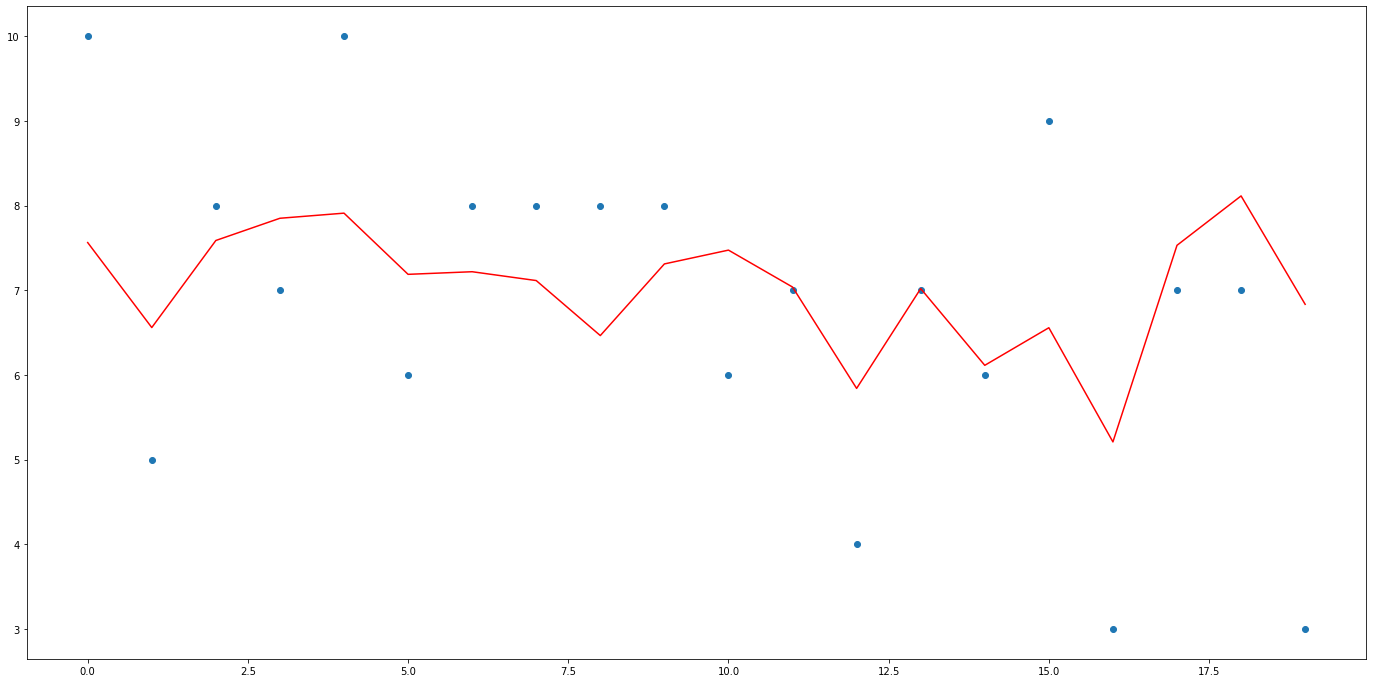

In [ ]:
#linear
total=0

#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(krr, train, train_label, scoring='neg_mean_squared_error', cv=5)
#print(np.sqrt(np.abs(np.mean(scores))))

xplt=np.arange(20) 

x_train, x_test, y_train, y_test = train_test_split(train,train_label,test_size=0.2)

model = LinearRegression().fit(x_train, y_train)
r_sq = model.score(x_train, y_train)
y_pred = model.intercept_ + np.sum(model.coef_ * x_test, axis=1)
total+=mean_squared_error(y_pred, y_test,squared=False)


print(mean_squared_error(y_pred, y_test,squared=False))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
plt.figure(figsize=(24,12))
plt.plot(xplt[:20], y_pred[:20], color="red")
plt.scatter(xplt[:20], y_test[:20])

In [ ]:
result=model.predict(test)
DF = pd.DataFrame(result) 
  
# save the dataframe as a csv file 
DF.to_csv("res3.csv")

In [ ]:
from sklearn.kernel_ridge import KernelRidge
import math

#x_train, x_test, y_train, y_test = train_test_split(train,train_label,test_size=0.25)

# For each of the tested polynomial degree values

krr = KernelRidge(alpha=1.0,kernel='linear',degree=2)

scores = cross_val_score(krr, train, train_label, scoring='neg_mean_squared_error', cv=5)
print(np.sqrt(np.abs(np.mean(scores))))

#krr.fit(x_train,y_train)
#new_y = krr.predict(x_test)
#rmse = math.sqrt(mean_squared_error(new_y, y_test))

#print(rmse)



1.9516843454653272
